# Isolér højeste peaks i nutlin sim
Nedenstående er et forsøg på at klassificere entrainment hvor vi kun kigger på de højeste peaks. Men det er svært at isolere peaks'ne consistent uden at miste information.

In [ ]:
# Running this after starting nutlin
# For finding a candidate for peak height of highest peaks.
def get_peak_height(y):
    y_peaks = find_peaks(y, height=None)[0][20:40]
    reference_height = 0

    for peak in y_peaks:
        if y[peak] > reference_height:
            reference_height = y[peak]
        else:
            continue
        
    return y_peaks, reference_height

In [ ]:
highest_peak_candidates, height_interval = get_peak_height(p_1)

In [ ]:
# Use "get_peak_height" after running nutlin sim to get a feeling for where the highest peaks are after adding nutlin
def find_highest_peaks_nutlin(y, reference_height):
    height_interval = [reference_height * 0.93, reference_height * 1.07]

    y_peaks = find_peaks(y, height=height_interval)[0]

    return y_peaks

In [ ]:
top_peaks_after_adding_nutlin = find_highest_peaks_nutlin(p_1, height_interval)

Text(0.5, 1.0, 'Oscillationer af p53 koncentration med perioden T = 329.1 [min]')

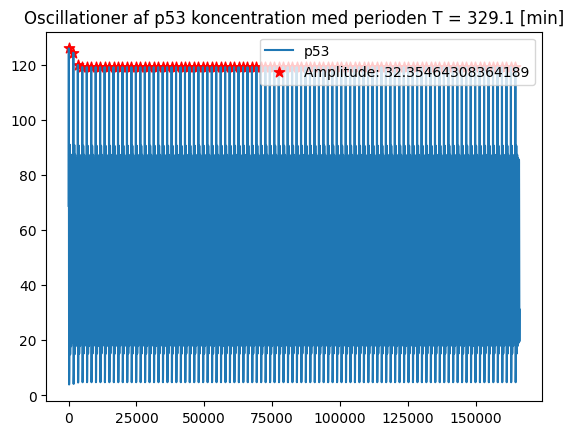

In [ ]:
plt.plot(t_1, p_1, label="p53")
plt.scatter(t_1[top_peaks_after_adding_nutlin], p_1[top_peaks_after_adding_nutlin], s=60, c="red", marker='*', label=f"Amplitude: {A_int}")

plt.legend()

plt.title(f"Oscillationer af p53 koncentration med perioden T = {T_int:.4} [min]")

In [ ]:
def check_period_convergence(t, peaks):
    period_spacing = np.diff(np.diff(t[peaks]))
    return period_spacing

In [ ]:
period_convergence = check_period_convergence(t_1, top_peaks_after_adding_nutlin)

In [ ]:
period_convergence

array([-1.54684419e+01, -1.31044558e+00, -3.52134052e+00, -9.45674140e-03,
       -3.11178534e-04, -7.58971328e-06, -1.23487553e-07, -8.36735126e-11,
        8.91304808e-11,  3.63797881e-12,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  7.27595761e-12,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [ ]:
x_dummy = np.arange(len(period_convergence))

Text(0.5, 1.0, 'Variation i periode?')

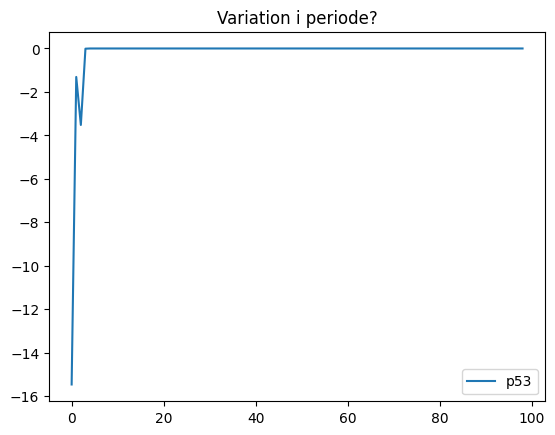

In [ ]:
plt.plot(x_dummy, period_convergence, label=r"p53")

plt.legend()

plt.title(f"Variation i periode?")

# Behold mange peaks med nutlin og prøv at kigge på konvergens af alle "serier"

In [ ]:
def sort_and_split_peak_series(t, y, threshold):
    """
    Takes the array of p53 values at the peaks found by our own implementation of "find_peaks" (see above)
    Computes the difference between succesive elements.
    Adds a small epsilon value to avoid division by zero (maybe this could be smaller or should be larger)
    Calculates the ratio between successive elements using a mask and takes the absolute value (this is for a scale invariant measure of difference)
    Calculate number of qualitatively different oscillations levels to use for division of period later.
    Selects the lastmost peak array index where the peak-ratios "splits" (i.e. is above the threshold. This is arbritary and might need to be changed).
    Finds the corresponding indeces in the original peak p53 array that corresponds to the sorted peak indices (this means, we should only select the top-most peak series, regardless of scale).
    """
    t_after_transient = t[t > 5000]
    indices_after_transient = np.where(t > 5000)[0]
    y_after_transient = y[indices_after_transient]

    _, _, _, all_y_peaks, _ = compute_external_oscillator(np.array(t_after_transient), np.array(y_after_transient))
    
    sorted = np.sort(y_after_transient[all_y_peaks])

    diff = np.diff(sorted)

    epsilon = 1e-10
    shifted_diff = diff + epsilon
    
    ratio = abs(shifted_diff[1:]/shifted_diff[:-1])

    no_of_series = len(np.where(ratio > threshold)[0]) + 1

    last = np.where(ratio > threshold)
    
    last_split_index = np.where(ratio > threshold)[0][-1] + 2 # Is this always the last one? It seems we need +2 because the index gets shifted twice. One by diff, one by ratio
    print(last)
    
    y_peaks = np.where(np.isin(y_after_transient, sorted[last_split_index:]))[0]

    return y_peaks, no_of_series

In [ ]:
p_peaks = sort_and_split_peak_series(t_1, p_1, 1000)[0] # Arbritary size right now of threshold
no_of_p_series = sort_and_split_peak_series(t_1, p_1, 1000)[1] # Arbritary size right now of threshold

(array([ 92, 185, 279]),)
(array([ 92, 185, 279]),)


In [ ]:
p_peaks

array([  709,   974,  1239,  1504,  1769,  2034,  2299,  2564,  2829,
        3094,  3359,  3624,  3889,  4154,  4419,  4684,  4949,  5214,
        5479,  5744,  6009,  6274,  6539,  6804,  7069,  7334,  7599,
        7864,  8129,  8394,  8659,  8924,  9189,  9454,  9719,  9984,
       10249, 10514, 10779, 11044, 11309, 11574, 11839, 12104, 12369,
       12634, 12899, 13164, 13429, 13694, 13959, 14224, 14489, 14754,
       15019, 15284, 15549, 15814, 16079, 16344, 16609, 16874, 17139,
       17404, 17669, 17934, 18199, 18464, 18729, 18994, 19259, 19524,
       19789, 20054, 20319, 20584, 20849, 21114, 21379, 21644, 21909,
       22174, 22439, 22704, 22969, 23234, 23499, 23764, 24029, 24294,
       24559, 24824, 25089, 25354])

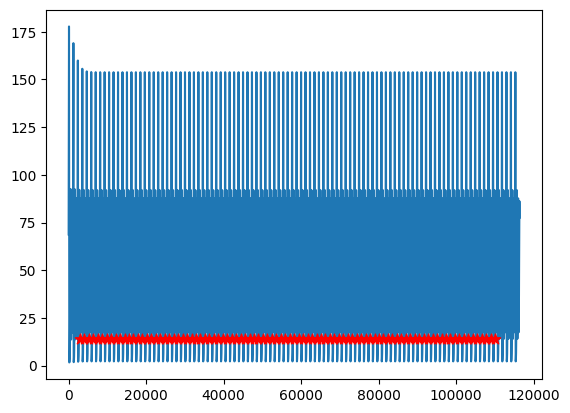

In [ ]:
plt.plot(t_1, p_1)
plt.scatter(t_1[p_peaks], p_1[p_peaks], s=60, c="red", marker='*', label=f"Amplitude: {A_int}", zorder=10)

In [ ]:
print(t_1[p_peaks], p_1[p_peaks])

[4300.18326265] [21.51427229]


In [ ]:
p_peaks

array([908])

Text(0.5, 1.0, 'Oscillationer af p53 koncentration med perioden T = 329.1 [min]')

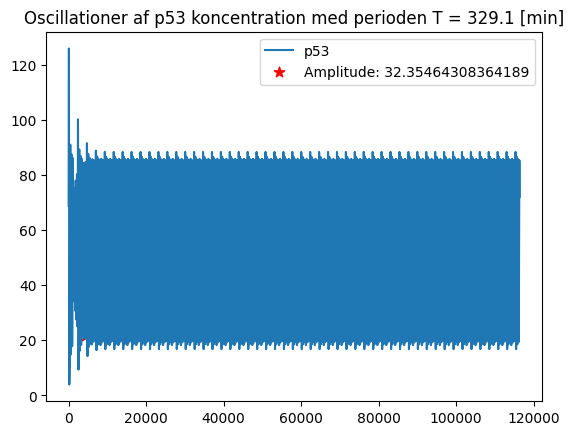

In [ ]:
plt.plot(t_1, p_1, label="p53")
plt.scatter(t_1[p_peaks], p_1[p_peaks], s=60, c="red", marker='*', label=f"Amplitude: {A_int}")

plt.legend()

plt.title(f"Oscillationer af p53 koncentration med perioden T = {T_int:.4} [min]")

### Udregn T_ext/T_int

In [ ]:
def ext_int_ratio(t, y_peaks, no_of_series, T_ext):
    T_int_arr = np.diff(t[y_peaks]) / no_of_series

    actual_OOmega = T_int_arr/T_ext

    return actual_OOmega

In [ ]:
actual_ratio = ext_int_ratio(t_1, p_peaks, no_of_p_series, T_ext_sim1)

In [ ]:
print(actual_ratio)

[]


In [ ]:
xxs = np.arange(len(actual_ratio))

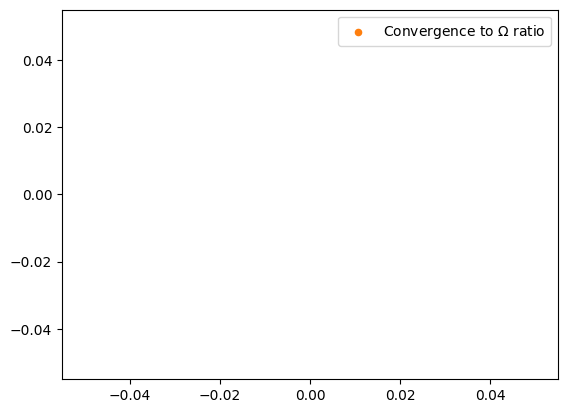

In [ ]:
plt.scatter(xxs, actual_ratio, s=20, color="C1", label=r"Convergence to $\Omega$ ratio")
plt.legend()


---
## Fra nutlin-simulation til afgørelse af entrainment
Herunder har jeg prøvet at sammenfatte, hvad der sker, fra vi har kørt en simualation med nutlin til vi finder ud af, om der er entrainment eller ej. Overblikket var mest for min egen skyld – ryd op i koden efterfølgende.

Givet array'sne `t_1` og `p_1` fra simulationen, udregnes peaksne i første omgang med `compute_external_oscillator`

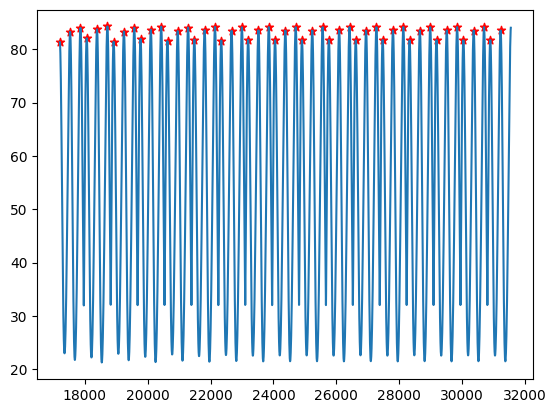

In [ ]:
_, _, _, all_p53_peaks_after_adding_nutlin, _ = compute_external_oscillator(np.array(t_1), np.array(p_1))

window_left = 50
window_right = 100

# Kinda cryptic, just windows it without transient
plt.scatter(t_1[all_p53_peaks_after_adding_nutlin[window_left:window_right]], p_1[all_p53_peaks_after_adding_nutlin[window_left:window_right]], marker='*', color="red")
plt.plot(t_1[all_p53_peaks_after_adding_nutlin[window_left]:all_p53_peaks_after_adding_nutlin[window_right]],p_1[all_p53_peaks_after_adding_nutlin[window_left]:all_p53_peaks_after_adding_nutlin[window_right]])

Peaksne findes på upåklagelig vis. Herover er plottet de halvtreds første peaks. Målet er nu at få bestemt perioden på en meget reliable måde, der gælder uanset, hvordan den givne simulation ser ud.

Funktionen tager `t_1`, `p_1` og arrayet med alle peak-indices. Den sorterer alle peak-værdierne i stigende grad. Herefter tager den differencen mellem nabo-værdier. Hertil ligges et lille epsilon, således at det er muligt at tage forholdet mellem nabo-værdier

In [ ]:
def fra_peaks_til_periode(t, p, peak_indices, threshold):
    """
    Takes the array of p53 values at the peaks found by our own implementation of "find_peaks" (see above)
    Computes the difference between succesive elements.
    Adds a small epsilon value to avoid division by zero (maybe this could be smaller or should be larger)
    Calculates the ratio between successive elements using a mask and takes the absolute value (this is for a scale invariant measure of difference)
    Calculate number of qualitatively different oscillations levels to use for division of period later.
    Selects the lastmost peak array index where the peak-ratios "splits" (i.e. is above the threshold. This is arbritary and might need to be changed).
    Finds the corresponding indeces in the original peak p53 array that corresponds to the sorted peak indices (this means, we should only select the top-most peak series, regardless of scale).
    """
    peaks = p[peak_indices]
    sorteret_peaks = np.sort(peaks)

    indices_that_sorts_array_peaks = np.argsort(peaks)
    sorted_peak_indices = peak_indices[indices_that_sorts_array_peaks]


    difference = np.diff(sorteret_peaks)
    epsilon = 1e-10
    shifted_diff = difference + epsilon

    ratio = abs(shifted_diff[1:] / shifted_diff[:-1])

    overgange_index = np.where(ratio > threshold)

    antal_forskellige_svingninger = len(overgange_index[0]) + 1

    # Den højeste af disse må pga np.sort være det sidste index. i overgange +2 pga forskydning
    sidste_index = overgange_index[0][-1] + 2

     # Værdierne for de højeste peaks findes
    højeste_peaks = sorteret_peaks[sidste_index:]

    # Indeksværdierne for disse peaks findes i de oprindelige lister. OBS: Kan måske drille, fordi værdierne er ens!
    index_højeste_peaks = np.array(sorted_peak_indices[sidste_index:])

    #Den interne periode bestemmes under antagelse af, at den er konstant mellem de forskellige slags svinginger

    deltat = t[index_højeste_peaks[1:]] - t[index_højeste_peaks[:-1]]
    # gns_periode = deltat / antal_forskellige_svingninger

    return index_højeste_peaks

In [ ]:
index_højeste_peaks = fra_peaks_til_periode(t_1, p_1, all_p53_peaks_after_adding_nutlin, 10)

In [ ]:
print(index_højeste_peaks)

[1977 1617 1911 1256 1845  896 1551 1190  830 1484 1123  762]


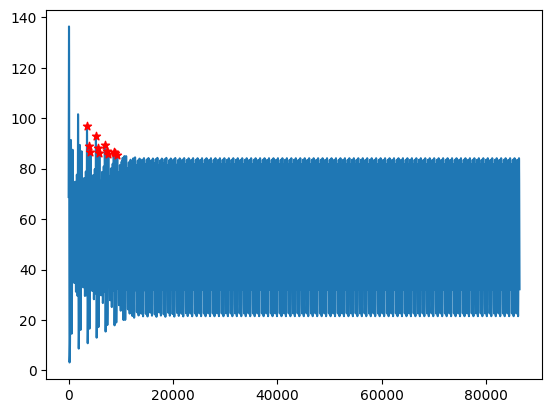

In [ ]:
plt.plot(t_1, p_1)
plt.scatter(t_1[index_højeste_peaks], p_1[index_højeste_peaks], marker='*', color="red", zorder=10)